In [165]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("dados_matriculas.xlsx")



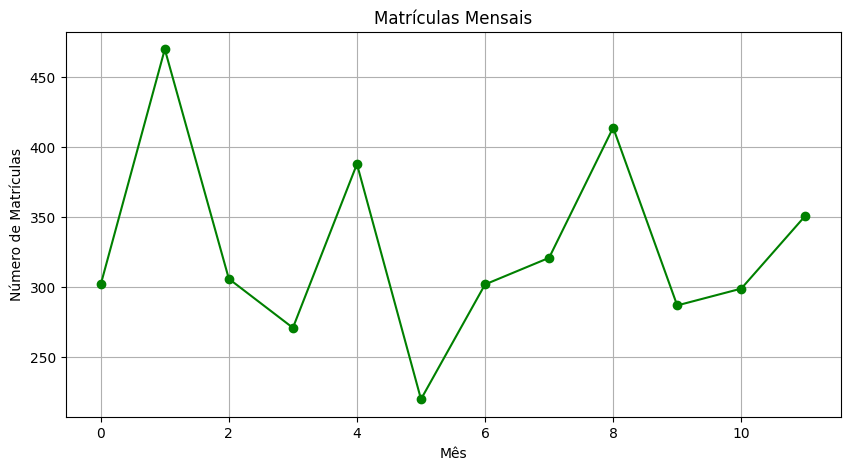

In [166]:
# Gráfico de matrículas mensais
#Titulo, legenda, ponto x e ponto y
plt.figure(figsize=(10,5))
df["Matrículas"].plot(marker='o', linestyle='-', color='green')
plt.title('Matrículas Mensais')
plt.xlabel('Mês')
plt.ylabel('Número de Matrículas')
plt.grid(True)
plt.show()

In [167]:
# Identificar o mês com maior e menor número de matrículas

maior_matricula = df['Matrículas'].max()
indice_maior_matricula = df['Matrículas'].idxmax()

print(maior_matricula)
print(indice_maior_matricula)

470
1


In [168]:
menor_matricula = df['Matrículas'].min()
indice_menor_matricula = df['Matrículas'].idxmin()


print(menor_matricula)
print(indice_menor_matricula)

220
5


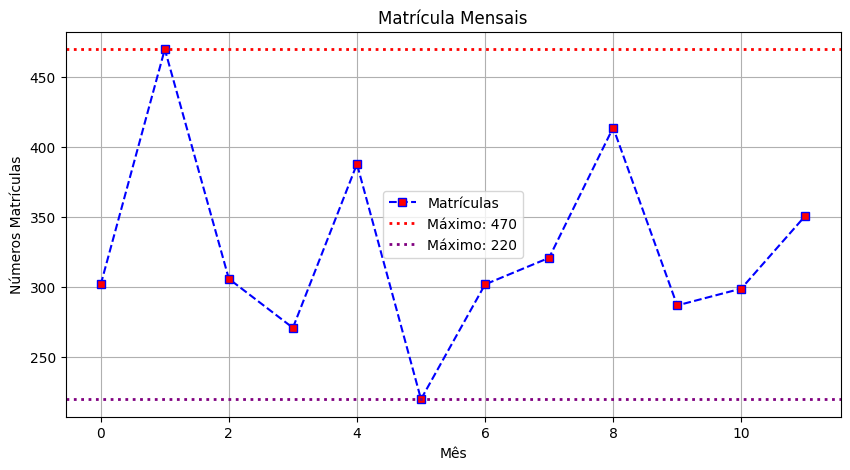

In [169]:
plt.figure(figsize=(10,5))
df['Matrículas'].plot(marker='s', linestyle = '--', color='blue', label='Matrículas', mfc='red')

# Informações de Destaque
plt.axhline(y = maior_matricula,
            color='red', 
            linestyle=":", 
            linewidth = 2, 
            label = f"Máximo: {maior_matricula}")
plt.axhline(y = menor_matricula,
            color='purple', 
            linestyle=":", 
            linewidth = 2, 
            label = f"Máximo: {menor_matricula}")
plt.title('Matrícula Mensais')
plt.xlabel('Mês')
plt.ylabel('Números Matrículas')
plt.grid(True)
plt.legend()
plt.show()



In [170]:
media_matricula = df ['Matrículas'].mean()

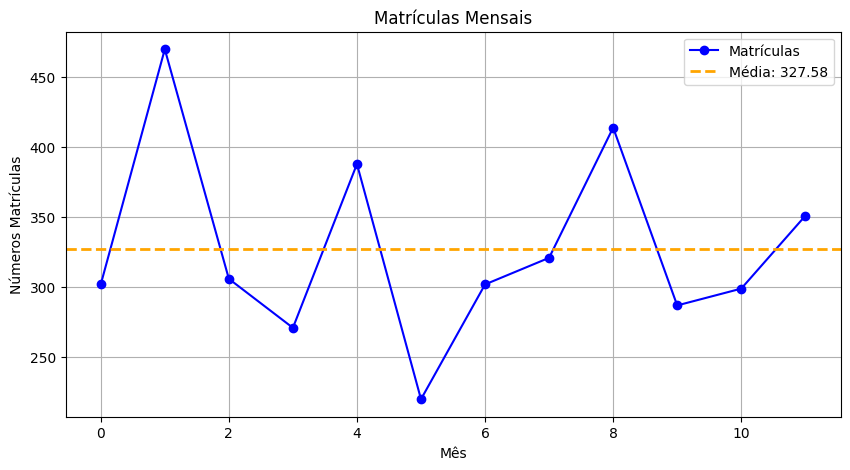

In [171]:
# Plotar o gráfico das matriculas mensais e destacar a media

plt.figure(figsize=(10,5))
df['Matrículas'].plot(marker='o', linestyle='-', color='blue', label='Matrículas')

# Linha de Destaque

plt.axhline(y = media_matricula,
            color='orange', 
            linestyle="--", 
            linewidth = 2, 
            label=f'Média: {media_matricula:.2f}')
plt.title('Matrículas Mensais')
plt.xlabel('Mês')
plt.ylabel('Números Matrículas')
plt.grid(True)
plt.legend()
plt.show()

In [172]:
# TENDÊNCIAS

# Calcular as médias das matrículas por trimestre

# Passo 1. Converter a coluna para DATETIME

df['Mês'] = pd.to_datetime(df['Mês'])

# Passo 2. Definir a coluna de Datas como índice
df.set_index(df['Mês'], inplace=True)

# Passo 3. Calcular a média do Trimestre
#  QE / Trimestre
#  QS / Semestre
#  Q / Quadrimestre
#  A / Anual
#  D / Diário
#  W / Semanal
#  H / Horário

media_trimestral = df["Matrículas"].resample('QE').mean().round(2)
print(media_trimestral)





Mês
2022-03-31    359.33
2022-06-30    293.00
2022-09-30    345.67
2022-12-31    312.33
Freq: QE-DEC, Name: Matrículas, dtype: float64


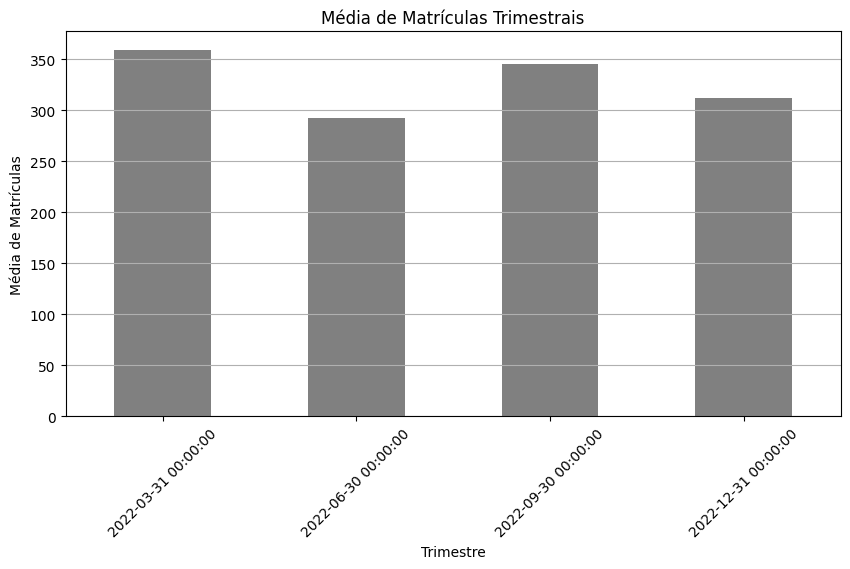

In [173]:
plt.figure(figsize=(10,5))
media_trimestral.plot(kind='bar', color="Gray")
plt.title("Média de Matrículas Trimestrais")
plt.xlabel("Trimestre")
plt.ylabel("Média de Matrículas")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Desvio Padrão
# Passo 1. Calcula Media
# Passo 2. Calcula o desvio em relação a média

JAN - 340
FEV - 345
MAR - 355
ABR - 600

MEDIA = 410

DESVIO
JAN = 340 - 410 = -70
FEV = 345 - 410 = -65
MAR = 355 - 410 = -55
ABR = 600 - 410 = 190

In [174]:
# Desvio Simples
df["Matrículas"] - df['Matrículas'].mean()


Mês
2022-01-31    -25.583333
2022-02-28    142.416667
2022-03-31    -21.583333
2022-04-30    -56.583333
2022-05-31     60.416667
2022-06-30   -107.583333
2022-07-31    -25.583333
2022-08-31     -6.583333
2022-09-30     86.416667
2022-10-31    -40.583333
2022-11-30    -28.583333
2022-12-31     23.416667
Name: Matrículas, dtype: float64

VARIÂNCIA

1. MEDIA
2. DESVIO SIMPLES

Passo 1. Valor do desvio elevado a 2
JAN = -70 ^2 = 4900
FEV = -65 ^2 = 4225
MAR = -55 ^2 = 3025
ABR = 190 ^2 = 36100

Passo 2. Media do desvio elevado
MEDIA = 12062.5 -> Valor da variância

DESVIO PADRÁO
1. MEDIA
2. DESVIO SIMPLES
3. VARIANCIA

MEDIA = 12062.5

RAIZ QUADRADA DELE = 109.8

In [175]:
variacao = df['Matrículas'].pct_change() * 100
print(variacao)

Mês
2022-01-31          NaN
2022-02-28    55.629139
2022-03-31   -34.893617
2022-04-30   -11.437908
2022-05-31    43.173432
2022-06-30   -43.298969
2022-07-31    37.272727
2022-08-31     6.291391
2022-09-30    28.971963
2022-10-31   -30.676329
2022-11-30     4.181185
2022-12-31    17.391304
Name: Matrículas, dtype: float64


In [176]:
# Calculo da variação padrão
# Variação 

In [177]:
import seaborn as sn

tabela_variacao = pd.DataFrame({
    'Matricula': df['Matrículas'],
    'Variação Percentual %': variacao
})

def colorir_variação(valor):
    if valor > 0:
        color = 'green'
    elif valor < 0:
        color = 'red'
    else:
        color = 'blue'
    return f'color: {color}'

tabela_variacao.style.map(colorir_variação, subset=['Variação Percentual %'])